In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image
import glob

In [2]:
import random

def generate_random_sequence(n):
    # List to store the generated sequence
    sequence = []

    # Function to generate a random number between 0 and 8 excluding the previous number
    def get_random_number(previous_number):
        while True:
            num = random.randint(0, 7)
            if num != previous_number:
                return num

    previous_number = None

    for _ in range(n):
        # Generate a random number
        num = get_random_number(previous_number)
        sequence.append(num)
        previous_number = num

    return sequence

# Specify the length of the sequence you want (e.g., n = 10)
n = 100
random_sequence = generate_random_sequence(n)

In [3]:
imgs = []
names = ['Adrien', 'AL', 'Hubert', 'Maman', 'Claire', 'PA', 'Arnaud', 'Lidia'] 
for i in range(8):
    
    imgs.append(np.asarray(Image.open("pics/"+f'{names[i]}.png')))

In [4]:
total_frames = 45

list_imgs_0 = []
list_imgs_1 = []
list_imgs_2 = []

power = 1.2
slow_start = 33
rdms = generate_random_sequence(total_frames)
for i, nb in enumerate(rdms):
    if i < slow_start:
        list_imgs_0.append(nb)
        
    if ((i > slow_start) & (i < total_frames)):
        for j in range(int((i-slow_start)**(power))):
            list_imgs_0.append(nb)


start_slow_1 = int(3*len(list_imgs_0) / 4)
# 
# change last roulette0 here

rdms1 = generate_random_sequence(start_slow_1)
rdms2 = generate_random_sequence(start_slow_1)

for i, nb in enumerate(rdms1):
    list_imgs_1.append(nb)
    list_imgs_2.append(rdms2[i])
    list_imgs_0.append(list_imgs_0[-1])


rdms = generate_random_sequence(total_frames)

for i, nb in enumerate(rdms):
    if i < slow_start:
        list_imgs_1.append(nb%8)

    if ((i > slow_start) & (i < total_frames)):
        for j in range(int((i-slow_start)**(power))):
            list_imgs_1.append(nb%8)

start_slow_2 = int(1*len(list_imgs_1) / 2)

# change last roulette1 here

rdms = generate_random_sequence(start_slow_2)

for i, nb in enumerate(rdms):
    list_imgs_2.append(nb%8)
    list_imgs_1.append(list_imgs_1[-1])
    list_imgs_0.append(list_imgs_0[-1])

rdms = generate_random_sequence(start_slow_2)

for i, nb in enumerate(rdms):
    if i < slow_start:
        list_imgs_2.append(nb%8)

    if ((i > slow_start) & (i < total_frames)):
        for j in range(int((i-slow_start)**(power))):
            list_imgs_2.append(nb%8)

total_frames = len(list_imgs_2)
# change last roulette1 here

In [5]:
 len(list_imgs_0)

327

In [6]:
total_frames

327

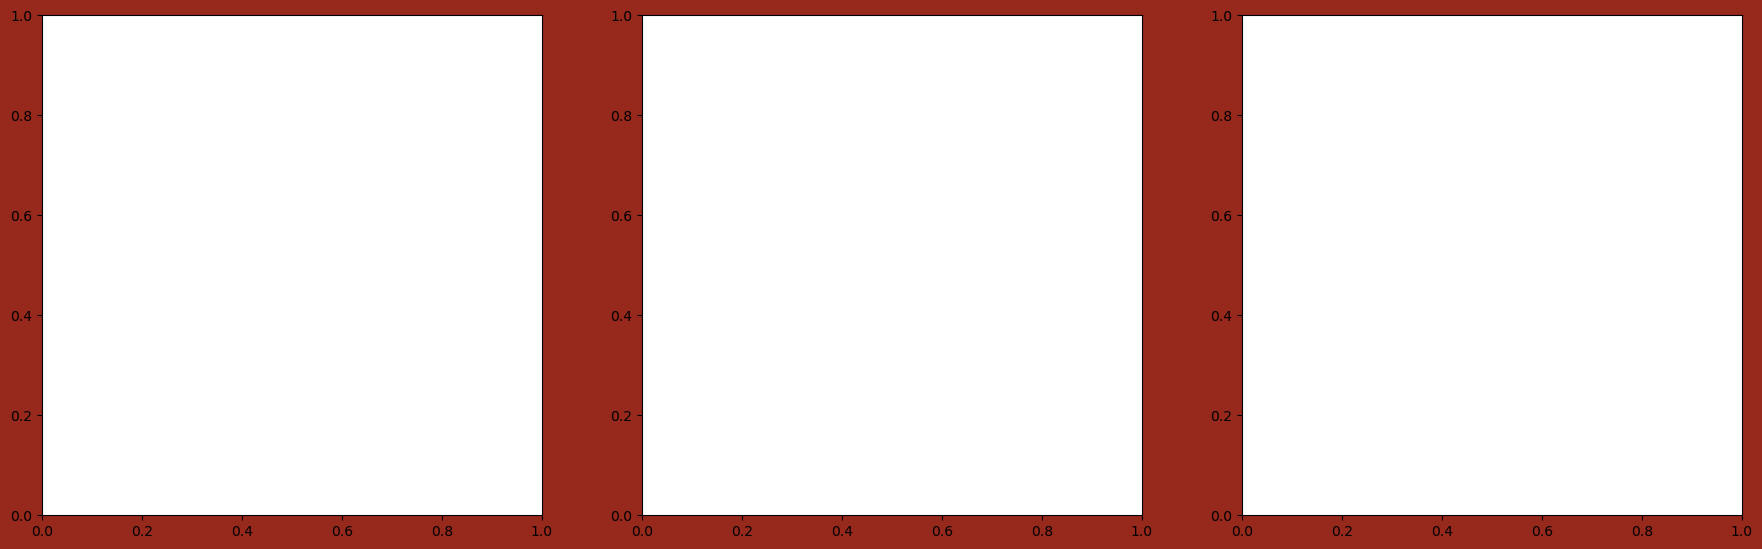

In [18]:

# Create a figure and axis
fig, ax = plt.subplots(1, 3, figsize=(17, 5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
fig.patch.set_facecolor([150/255, 40/255, 28/255])
# Function to initialize the plot
def init():
    ax[0].clear()

    return []

# Function to update the plot for each frame
def update(frame):
#     print(frame+1%8)
    ax[0].clear()
    # Your plotting code here
    ax[0].imshow(imgs[list_imgs_0[frame]])
    
    ax[1].clear()
    # Your plotting code here
    ax[1].imshow(imgs[list_imgs_1[frame]])
    
    ax[2].clear()
    # Your plotting code here
    ax[2].imshow(imgs[list_imgs_2[frame]])
    for i in range(3):
        ax[i].set_xticks([])
        ax[i].set_yticks([])

# Create the animation
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, repeat=False, interval=50)


In [19]:
ani.save('test_roulette.mp4') #, dpi=5)